# Create spectrograms


All mp3 placed in the rumbles folder will be processed and stored in the spectrograms folder

In [ ]:
import librosa
import librosa.display

from fastai.vision.all import *

In [ ]:
# Project path
root_path = Path("/datasets/dzanga-bai/dzanga-bai")


def mp3_to_mel_spectrogram(path, root=root_path):

    p = str(path)
    print(f"Processing mp3 : {p}")
    # librosa doesnt play well with Path objects, converting to string
    y, sr = librosa.load(p)

    fig= plt.figure()
    # Passing through arguments to the Mel filters
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                        fmax=8000)

    S_dB = librosa.power_to_db(S, ref=np.max)

    img = librosa.display.specshow(S_dB, x_axis='time',
                            y_axis='mel', sr=sr,
                            fmax=8000)
    plt.axis('off')
    #plt.show()
    plt.savefig(root/f"elephantvoices/spectrograms/{path.stem}.png")
    plt.close()



# Store all wav files as Path objects
mp3_paths = sorted((root_path/'elephantvoices/rumbles').glob('*.mp3'))
_ = list(map(mp3_to_mel_spectrogram,mp3_paths))

Processing mp3 : /datasets/dzanga-bai/dzanga-bai/elephantvoices/rumbles/Baroo-Rumble (F0305734).mp3
/root/venv/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
Processing mp3 : /datasets/dzanga-bai/dzanga-bai/elephantvoices/rumbles/Squelch (A3103741).mp3
/root/venv/lib/python3.7/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


# Predict classes

## Age Category prediction

In [ ]:
# Run inference


age_model = load_learner(root_path/"models/baseline_resnet152")

/datasets/dzanga-bai/dzanga-bai/elephantvoices/spectrograms/Baroo-Rumble (F0305734).png


/shared-libs/python3.7/py/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
('ad/sa', tensor(0), tensor([0.9970, 0.0030]))
/datasets/dzanga-bai/dzanga-bai/elephantvoices/spectrograms/Squelch (A3103741).png


('inf/juv', tensor(1), tensor([0.4864, 0.5136]))


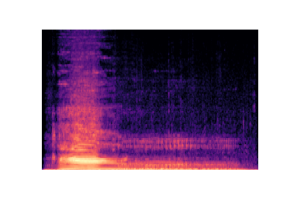

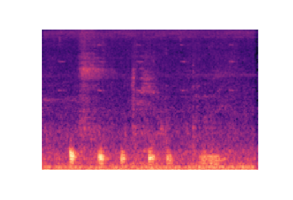

In [ ]:
for spectrogram in (root_path/"elephantvoices/spectrograms").glob("*.png"):
    print(spectrogram)
    img = PILImage.create(str(spectrogram))
    img.show()
    print(age_model.predict(img))

## Gender Prediction

In [ ]:
sex_model = load_learner(root_path/"models/baseline_resnet152_sex")

/datasets/dzanga-bai/dzanga-bai/elephantvoices/spectrograms/Squelch (A3103741).png


('m', tensor(1), tensor([0.4720, 0.5280]))
/datasets/dzanga-bai/dzanga-bai/elephantvoices/spectrograms/Baroo-Rumble (F0305734).png


('f', tensor(0), tensor([0.6844, 0.3156]))


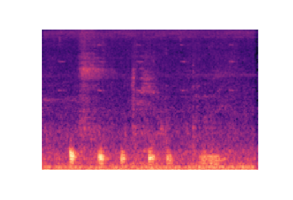

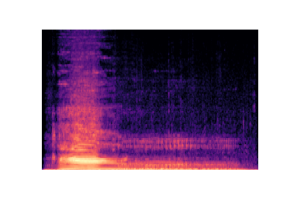

In [ ]:
for spectrogram in (root_path/"elephantvoices/spectrograms").glob("*.png"):
    print(spectrogram)
    img = PILImage.create(str(spectrogram))
    img.show()
    print(sex_model.predict(img))

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7aa10abb-09ba-4e5c-b109-d1b9cd39afe4' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>